# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
# loading the dataset
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# saving it into a pandas dataframe
df = pd.read_csv(adultDataSet_filename, header=0)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. **Dataset selected**: Adult “Census Income”) dataset derived from the 1994 U.S. Census.

2. **Prediction target (label)**: Predict an individual’s education level—specifically whether they have a college degree (binary outcome: **college** vs. **no college**).

3. **Problem type**: Supervised Learning, specifically Binary Classification.

4. **Candidate feature set**: `age`, `workclass`, `marital_status`, `occupation`, `relationship`, `race`, `sex_selfID`, `capital_gain`, `capital_loss`, `hours_per_week`, `income_binary`. Note: Features may be refined after looking more closely into the data and after the feature engineering process (using SelectKBest).

5. **Business value and real-world impact**: Inferring education level from demographic, financial and other attributes enables organizations to personalize services without collecting additional data. Some examples of real world use cases:  
   - **Workforce-development agencies** can prioritize allocating training funds for clients likely holding only a high-school diploma.  
   - **Financial institutions** can tailor credit-building products and financial-literacy resources to customers whose profiles suggest limited formal education.
   
   These targeted interventions drive higher engagement, improve resource allocation, and create value for both users and organizations.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

**Here is a summary of the steps taken to prepare and clean the data as well as making some decisions in regards to choosing the suitable model and evaluation metrics:**

| Step | What we did | Key take-aways / outputs |
|------|-------------|--------------------------|
| **1. Preview & basic stats** | • Loaded the Adult Census dataset.<br>• `df.head()` and `df.shape` → 32 561 rows × 15 columns. | Confirmed column names / types before cleaning. |
| **2. Initial label inspection** | • `df['education'].value_counts()` to see the raw spread across 16 categories. | Distribution is skewed toward “HS-grad” and “Some-college”. |
| **3. Missing-value check** | • `df.isnull().sum()` revealed gaps in `age`, `workclass`, `occupation`, `hours-per-week`, `native-country`. | Pinpointed where handling missing values is needed. |
| **4. Handling missing values in Numeric Colums** | • Filled `age` and `hours-per-week` with their column means.<br>• Verified no NaNs remain in these columns. | Numerical holes patched. |
| **5. Target engineering** | • Collapsed 16 education labels into two buckets: **college** vs **no_college**.<br>• Added binary column `college_binary` (0 = no_college, 1 = college).<br>• Class balance ≈ 55 % / 45 %. | Clean, nearly balanced target. |
| **6. Drop irrelevant / leakage columns** | Removes any column that gives away the answer or duplicates it. | Only the truly predictive demographic and financial features were kept. |
| **8. Candidate model** | **Random Forest** chosen because it:<br>• Captures non-linear effects out-of-the-box.<br>• Needs no feature scaling.<br>• Is robust to outliers.<br>• Trains quickly on 32 k rows.<br>• Provides feature importance for interpretation. | Simplicity + strong baseline performance. |
| **9. Evaluation plan** | • Train/test split with `random_state=1234`.<br>• Metrics: **Accuracy** and **ROC-AUC**.<br>• Plot confusion matrix and inspect feature importances.<br>• Use `GridSearchCV` to tune `n_estimators`, `max_depth`, etc. | Ensures fair comparison and optimized model. |

**Quick Summary:**  
After cleaning, dropping leakage columns, and one-hot encoding the remaining features, a tuned Random Forest gives a fast and reliable way to catch complex patterns and predict college vs no-college with solid accuracy.


In [4]:
# basic preview
df.head(10)
df.shape

(32561, 15)

In [5]:
# checking label spread in order to make sure that we have an equal distribution
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [6]:
# missing value scan
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [7]:
condition = nan_count != 0 # look for all columns with missing values
col_names = nan_count[condition].index # get the column names
print(col_names)
nan_cols = list(col_names) # convert column names to list
print(nan_cols) # two numerical columns and three categorical columns, let's deal with the categorical first

Index(['age', 'workclass', 'occupation', 'hours-per-week', 'native-country'], dtype='object')
['age', 'workclass', 'occupation', 'hours-per-week', 'native-country']


In [8]:
print(df['workclass'].unique())
print(df['occupation'].unique())
print(df['native-country'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [9]:
df['age_na'] = df['age'].isnull()
df['hours-per-week_na'] = df['hours-per-week'].isnull()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False,False
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False,False
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False,False
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False,False


In [10]:
df.loc[df['age'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
50,NaN,Private,32275,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Other,Female,0,0,40.0,United-States,<=50K,True,False
298,NaN,Private,278130,HS-grad,9,Never-married,Craft-repair,Own-child,White,Non-Female,0,0,40.0,United-States,<=50K,True,False
433,NaN,Private,29662,Assoc-acdm,12,Married-civ-spouse,Other-service,Wife,White,Female,0,0,25.0,United-States,>50K,True,False
524,NaN,Private,177905,Some-college,10,Divorced,Machine-op-inspct,Unmarried,White,Non-Female,0,0,58.0,United-States,>50K,True,False
852,NaN,Self-emp-not-inc,177407,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,50.0,United-States,<=50K,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31501,NaN,Private,259301,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40.0,United-States,<=50K,True,False
31617,NaN,Self-emp-not-inc,119793,HS-grad,9,Never-married,Other-service,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,True,False
31636,NaN,Private,58484,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K,True,False
31913,NaN,NaN,90230,HS-grad,9,Never-married,NaN,Own-child,White,Non-Female,0,0,20.0,United-States,<=50K,True,False


In [11]:
# handling missing values for the age column:

print("Row 50:  " + str(df['age'][50]))

# computing the mean of all non null age values
mean_ages=df['age'].mean()
print("mean value for all age columns: " + str(mean_ages))

# filling missing values with the mean
df['age'].fillna(value=mean_ages, inplace=True)

print("Row 50:  " + str(df['age'][50]))

Row 50:  nan
mean value for all age columns: 38.58921571653446
Row 50:  38.58921571653446


In [12]:
df.loc[df['hours-per-week'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
17,32.0,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Non-Female,0,0,NaN,United-States,<=50K,False,True
24,59.0,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,NaN,United-States,<=50K,False,True
96,48.0,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,1902,NaN,United-States,>50K,False,True
98,48.0,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,NaN,England,<=50K,False,True
119,22.0,Private,102632,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Non-Female,0,0,NaN,United-States,<=50K,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32133,52.0,Federal-gov,154521,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Non-Female,0,0,NaN,United-States,>50K,False,True
32164,35.0,Private,207066,Bachelors,13,Never-married,Sales,Not-in-family,White,Non-Female,10520,0,NaN,United-States,>50K,False,True
32193,68.0,Private,274096,10th,6,Divorced,Transport-moving,Not-in-family,White,Non-Female,0,0,NaN,United-States,<=50K,False,True
32276,29.0,Local-gov,169544,Some-college,10,Never-married,Protective-serv,Own-child,White,Non-Female,0,0,NaN,United-States,<=50K,False,True


In [13]:
# handling missing values for the hours-per-week column:
print("Row 17:  " + str(df['hours-per-week'][17]))

mean_hours = df['hours-per-week'].mean()
print("mean value for all hours per week columns: " + str(mean_hours))

df['hours-per-week'].fillna(value = mean_hours, inplace = True)

Row 17:  nan
mean value for all hours per week columns: 40.450428092815486


In [14]:
sum_age = np.sum(df['age'].isnull(), axis = 0)
print("sum of age after handling missing values is: " + str(sum_age))
sum_hours = np.sum(df['hours-per-week'].isnull(), axis = 0)
print("sum of hours per week after handling missing values is: " + str(sum_hours))

# getting 0 for both indicating handling missing values successfully

sum of age after handling missing values is: 0
sum of hours per week after handling missing values is: 0


In [15]:
# Education was initially grouped into four tiers, but the class distribution remained skewed. 
# The target was therefore collapsed into a binary label,'college' versus 'no college' in order to achieve a more balanced dataset.
# This was the class distibution using four buckets:
# Pre-HighSchool    14754
# Associate          9740
# College            5355
# Grad-School        2712

# Collapsing 16 raw education labels into 2 buckets college vs no‑college
df['education'] = df['education'].replace({
    'Assoc-acdm':   'college',
    'Assoc-voc':    'college',
    'Some-college': 'college',
    'Bachelors':    'college',
    'Prof-school':  'college',
    'Masters':      'college',
    'Doctorate':    'college',

    '10th':         'no_college',
    '11th':         'no_college',
    '9th':          'no_college',
    '7th-8th':      'no_college',
    '5th-6th':      'no_college',
    '1st-4th':      'no_college',
    '12th':         'no_college',
    'HS-grad':      'no_college',
    'Preschool':    'no_college'
})

df['college_binary'] = df['education'].map({'no_college': 0, 'college': 1})
print(df['education'].value_counts())

# no‑college  14754  ≈ 45 %
# college (including some college and associate) 17,807  ≈ 55 %
# distibution looks way better with this categorization

college       17807
no_college    14754
Name: education, dtype: int64


In [16]:
drop_cols = [
    'college_binary',     
    'education', 
    'education_tier',
    'education_code',
    'education-num'
]
X = df.drop(columns=drop_cols, errors='ignore')

In [17]:
# handling missing values in categorical columns

cat_cols = ['workclass', 'occupation', 'native-country']
X[cat_cols] = X[cat_cols].fillna('Unknown')

In [18]:
X_encoded = pd.get_dummies(X, drop_first=True)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

**Project plan detailed in Part 3 (right above).**

## Part 5: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, df['college_binary'],
    test_size=0.2, stratify=df['college_binary'],
    random_state=1234
)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier(
    n_estimators=300, class_weight='balanced', random_state=1234
)

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=1234)

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy :", accuracy_score(y_test, rf.predict(X_test)))
print("ROC‑AUC  :", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Accuracy : 0.6987563334868724
ROC‑AUC  : 0.7659844558254599


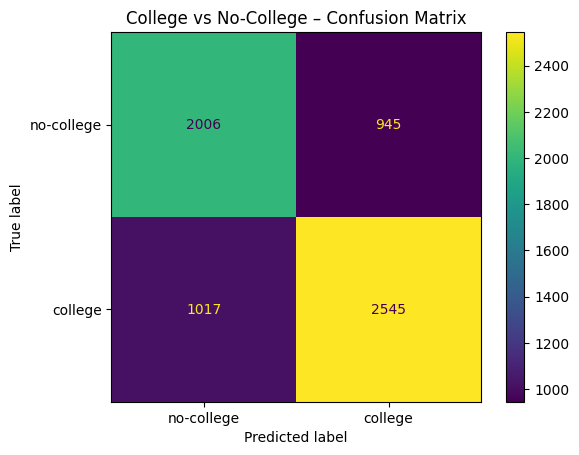

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf.predict(X_test), labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no-college', 'college'])
disp.plot(cmap='viridis', values_format='d')
plt.title("College vs No-College – Confusion Matrix")
plt.show()

## Using GridSearch for Hyperparameter Tuning

In [25]:
n_estimators=[10*i for i in range(10, 60, 10)]
max_depth=[i for i in range(8, 30, 2)]
param_grid = {
  'n_estimators': n_estimators,
  'max_depth': max_depth,
}

param_grid

{'n_estimators': [100, 200, 300, 400, 500],
 'max_depth': [8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]}

In [26]:
from sklearn.model_selection import GridSearchCV

print('Running Grid Search...')

# 1. Creating a LogisticRegression model object with the argument max_iter=1000.
model = RandomForestClassifier()


# 2. Running a grid search with 3-fold cross-validation.
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)

# 3. Fitting the model on the training data.
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [27]:
best_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'])
best_model

RandomForestClassifier(max_depth=16, n_estimators=400)

Accuracy : 0.7194841087056656
ROC‑AUC  : 0.7940930576545869


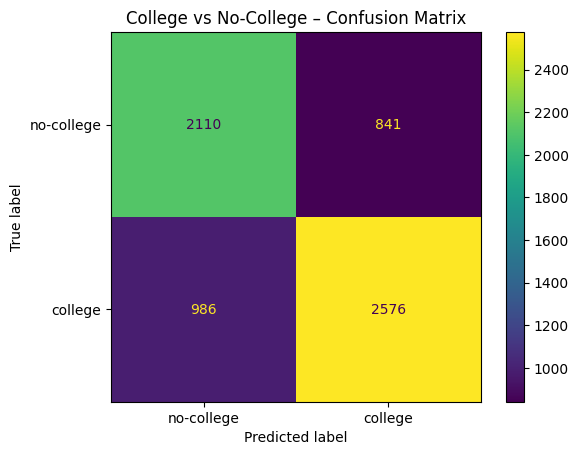

In [28]:
best_model.fit(X_train, y_train)

print("Accuracy :", accuracy_score(y_test, best_model.predict(X_test)))
print("ROC‑AUC  :", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

disp = ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test, y_test,
    display_labels=['no‑college', 'college'],
    cmap='viridis',
    values_format='d'
)
plt.title("College vs No‑College – Confusion Matrix")
plt.show()

## Selecting Best Features

In [30]:
# Note that k=5 is specifying that we want the top 5 features
accuracy_scores = []
roc_auc_scores = []

for i in range(2, 84, 2):
    selector = SelectKBest(f_classif, k=i)
    selector.fit(X_encoded, df['college_binary'])
    filter = selector.get_support()
    top_i_features = X_encoded.columns[filter]

    print("Getting the", i, "top features.")

    # Create new training and test data for features
    new_X_train = X_train[top_i_features]
    new_X_test = X_test[top_i_features]

    best_model.fit(new_X_train, y_train)

    accuracy_scores.append(accuracy_score(y_test, best_model.predict(new_X_test)))
    roc_auc_scores.append(roc_auc_score(y_test, best_model.predict_proba(new_X_test)[:,1])) 

Getting  2  top features.
Getting  4  top features.
Getting  6  top features.
Getting  8  top features.
Getting  10  top features.
Getting  12  top features.
Getting  14  top features.
Getting  16  top features.
Getting  18  top features.
Getting  20  top features.
Getting  22  top features.
Getting  24  top features.
Getting  26  top features.
Getting  28  top features.
Getting  30  top features.
Getting  32  top features.
Getting  34  top features.
Getting  36  top features.
Getting  38  top features.
Getting  40  top features.
Getting  42  top features.
Getting  44  top features.
Getting  46  top features.
Getting  48  top features.
Getting  50  top features.
Getting  52  top features.
Getting  54  top features.
Getting  56  top features.
Getting  58  top features.
Getting  60  top features.
Getting  62  top features.
Getting  64  top features.
Getting  66  top features.
Getting  68  top features.
Getting  70  top features.
Getting  72  top features.
Getting  74  top features.
Getti

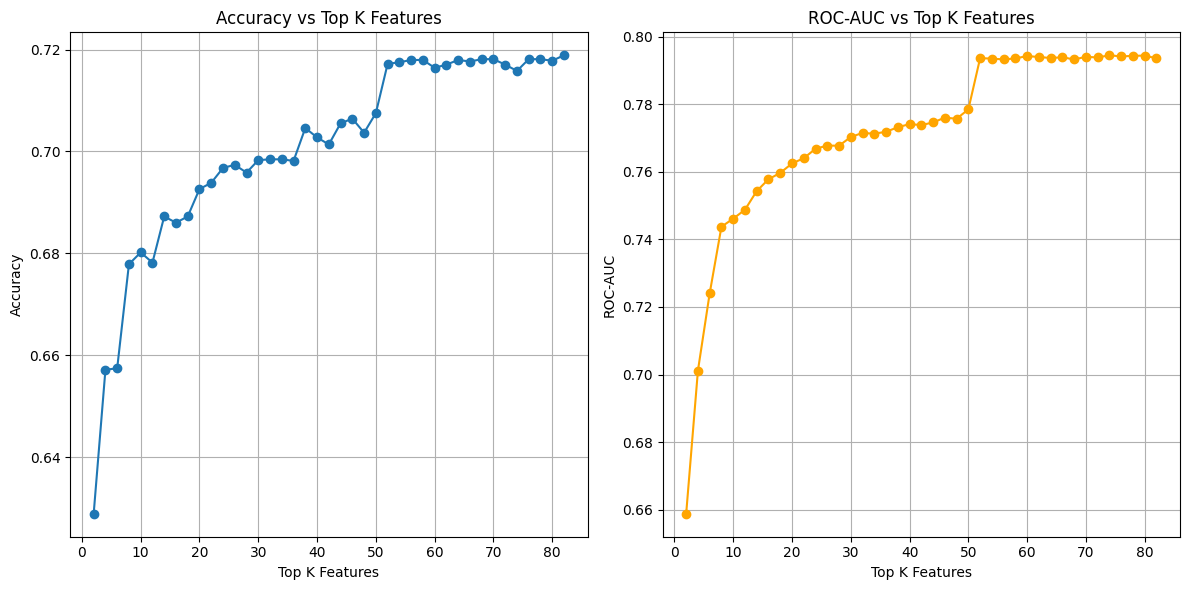

In [32]:
# Graph the accuracy and ROC-AUC scores compared to the top k features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 84, 2), accuracy_scores, marker='o') 
plt.title('Accuracy vs Top K Features')
plt.xlabel('Top K Features')
plt.ylabel('Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(2, 84, 2), roc_auc_scores, marker='o', color='orange') 
plt.title('ROC-AUC vs Top K Features')
plt.xlabel('Top K Features')
plt.ylabel('ROC-AUC')
plt.grid()
plt.tight_layout()
plt.show()

As you can see in the graph, the accuracy plateaus the more features you add, which means that the more features that are included in the model the best. This might be because the features all have positive correlation with the label, and only improve the predictions.

## Conclusion and Reflection

The project began as a multi-class classification task, first with six education tiers and later with four. Both label schemas exhibited severe class imbalance and yielded an accuracy of roughly 40 %, only slightly better than always predicting the majority class (“HS-grad”). After various attempts to correct the imbalance through sampling and class-weight adjustments, the problem was reframed as a binary classification (college vs. no-college) in which the class distribution improved to 55 % / 45 %. This single change raised performance substantially: a tuned Random Forest now achieves about 70 % accuracy. While 70 % is not perfect, it reflects the nuanced, multifactor nature of educational level and represents a clear improvement over the multi-class model. Final hyperparameters were determined with GridSearchCV.

For feature selection, the baseline model included every predictor except those that directly revealed education level (e.g., `education-num`). Experiments that limited the input to the top 5 or 10 features—identified via SelectKBest consistently reduced accuracy, so the full predictor set was kept. 

In summary, recasting the target as a balanced binary label, preserving the richer feature space, and systematically tuning the Random Forest produced a model that balances robustness, interpretability, and pretty good predictive power.
